In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib


In [4]:
torch.cuda.is_available()
torch.backends.cudnn.enabled


True

In [5]:
#overcast 20191030T161529_VOOR
#partly 20191112T183029_VOOR
#clear 20190511T122529_VOOR
PATH = '/home/arnold/clouds_detection/ALL'
data_dir = pathlib.Path(PATH)
#resize image 
# sz=224
# List containing the entries in the directory given by PATH
os.listdir(PATH)
image_count = len(list(data_dir.glob('*/*.jpg')))

batch_size = 32
img_height = 720
img_width = 1080

print(image_count)

44799


In [6]:
rains = list(data_dir.glob('rain/*'))
# PIL.Image.open(str(roses[0]))

In [7]:
files = os.listdir(f'{PATH}/clear')[:10]
files

['20190728T001526_BKLN.jpg',
 '20190401T134527_BKLN.jpg',
 '20190627T103027_BKLN.jpg',
 '20190711T122026_BKLN.jpg',
 '20190311T134526_BKLN.jpg',
 '20190204T173027_BKLN.jpg',
 '20190416T103526_BKLN.jpg',
 '20190522T161526_BKLN.jpg',
 '20190205T195027_BKLN.jpg',
 '20190622T003527_BKLN.jpg']

(720, 1080, 3)

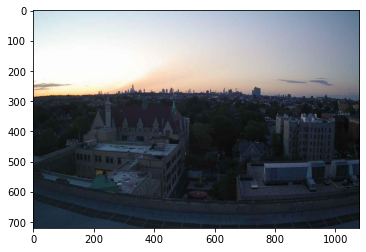

In [8]:
img = plt.imread(f'{PATH}/clear/{files[9]}')
plt.imshow(img);
img.shape
# First 4 rows and columns of the image
#img[:4,:4]

In [9]:
# #cropping top of image 
# height, width, channels = img.shape
# print(int(height/3))
# croppedImage = img[0:int(height/3), 0:width] #this line crops
# # croppedImage = img[0:360, 0:width] #this line crops

# plt.imshow(croppedImage);
# croppedImage.shape

In [10]:
# #cropping center
# image = tf.image.resize_with_crop_or_pad(img, 240, 1280) 
# image = tf.image.random_crop(image, size=[240, 1280, 3])
# plt.imshow(image);
# image.shape
# # Random crop back to the original size
# #   image = tf.image.random_crop(image, size=[IMG_SIZE, IMG_SIZE, 3])

In [11]:
# input_shape = (1,720, 1280, 3)
# print(input_shape)
# x = np.arange(np.prod(input_shape)).reshape(input_shape)
# y = tf.keras.layers.Cropping2D(cropping=((2, 2), (4, 4)))(x)
# print(y.shape)

In [12]:
# #WORKS to crop multi images now need to save them for a model

# folder_path = '/home/mesonet/cam_photos/2018/08/17/ESSX'
# from keras.preprocessing import image

# # load all images into a list
# paths = []
# images = []
# for img in os.listdir(folder_path):
#     img = os.path.join(folder_path, img)
#     paths.append(img)
#     img = image.load_img(img, target_size=(img_height, img_width))
#     img = image.img_to_array(img)
#     img = img[0:int(height/3), 0:width]
#     img = np.expand_dims(img, axis=0)
#     images.append(img)
# # print(images[1])
# # stack up images list to pass for prediction
# images = np.vstack(images)

# #print(paths[-1])
# #PIL.Image.open(paths[-1])
# plt.figure(figsize=(10, 10))
# for i in range(15):
#     ax = plt.subplot(5, 3, i + 1)
#     plt.imshow(images[i].astype("uint8"))
#     plt.axis("off")

In [13]:
def read_dirs(path, folder):
    labels, filenames, all_labels = [], [], []
    full_path = os.path.join(path, folder)
    for label in sorted(os.listdir(full_path)):
        if label not in ('.ipynb_checkpoints'):
            all_labels.append(label)
            for fname in os.listdir(os.path.join(full_path, label)):
                filenames.append(os.path.join(folder, label, fname))
                labels.append(label)
    return filenames, labels, all_labels

In [14]:
#run rm -rf .ipynb_checkpoints to get correct class names

In [15]:
#below if not cropping

In [16]:
#look under fine tune in https://www.tensorflow.org/tutorials/load_data/images to add cropping into pipeline myself

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 44799 files belonging to 7 classes.
Using 35840 files for training.


In [17]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 44799 files belonging to 7 classes.
Using 8959 files for validation.


In [18]:
# #use this manual method orr above if not cropping
# list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
# list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)
# for f in list_ds.take(5):
#   print(f.numpy())

# class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
# print(class_names)
# #split into training and val 
# val_size = int(image_count * 0.2)
# train_ds = list_ds.skip(val_size)
# val_ds = list_ds.take(val_size)

# print(tf.data.experimental.cardinality(train_ds).numpy())
# print(tf.data.experimental.cardinality(val_ds).numpy())


In [19]:
# def get_label(file_path):
#   # convert the path to a list of path components
#     parts = tf.strings.split(file_path, os.path.sep)
#   # The second to last is the class-directory
#     one_hot = parts[-2] == class_names
#   # Integer encode the label
#     return tf.argmax(one_hot)

# def decode_img(img):
#   # convert the compressed string to a 3D uint8 tensor
#     img = tf.image.decode_jpeg(img, channels=3)
#   # resize the image to the desired size
#     return tf.image.resize(img, [img_height, img_width])


# def process_path(file_path):
#     label = get_label(file_path)
#   # load the raw data from the file as a string
#     img = tf.io.read_file(file_path)
#     img = decode_img(img)
# #     img = image.img_to_array(img)
#     height, width, channels = img.shape
# #     img = img[0:int(height/3), 0:width] #1/3 top 
#     img = img[0:int(height/2), 0:width] #half
#     print(img.shape)
#     return img, label

In [20]:
# # Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
# AUTOTUNE = tf.data.experimental.AUTOTUNE

# train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
# val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

# for image, label in train_ds.take(1):
#   print("Image shape: ", image.numpy().shape)
#   print("Label: ", label.numpy())

In [21]:
# def configure_for_performance(ds):
#     ds = ds.cache()
#     ds = ds.shuffle(buffer_size=1000)
#     ds = ds.batch(batch_size)
#     ds = ds.prefetch(buffer_size=AUTOTUNE)
#     return ds

# train_ds = configure_for_performance(train_ds)
# val_ds = configure_for_performance(val_ds)

# image_batch, label_batch = next(iter(train_ds))

# plt.figure(figsize=(10, 10))
# for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(image_batch[i].numpy().astype("uint8"))
#     label = label_batch[i]
#     plt.title(class_names[label])
#     plt.axis("off")

In [22]:
# model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=3
# )

In [23]:
#comment out if doing cropping
class_names = train_ds.class_names

In [24]:

print(class_names)
print(train_ds)

['clear', 'few', 'night', 'overcast', 'rain', 'scattered', 'snow']
<BatchDataset shapes: ((None, 720, 1080, 3), (None,)), types: (tf.float32, tf.int32)>


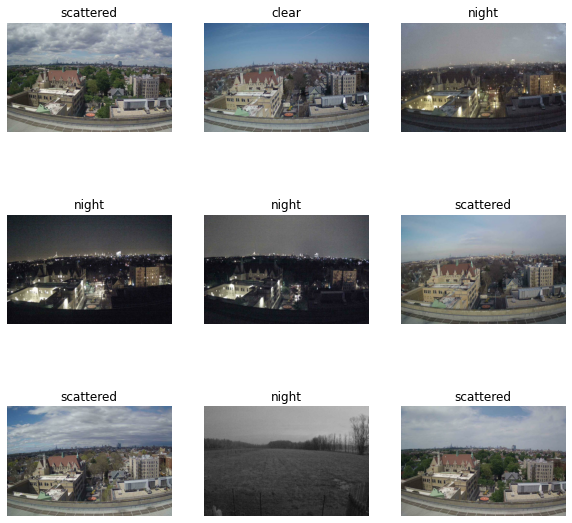

In [25]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [26]:
#tensor of shape (bathsize, hgt, width, rgb)
#call .numpy() on the image_batch and labels_batch tensors to convert them to a numpy.ndarray
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 720, 1080, 3)
(32,)


In [27]:
#NOTE
'''
Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch. 
This will ensure the dataset does not become a bottleneck while training your model. 
If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

Dataset.prefetch() overlaps data preprocessing and model execution while training.
'''
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [28]:
#RGB channel values are in the [0, 255] range. Bad for neural network; want input values small. 
#Standardize values to be in the [0, 1] by using a Rescaling layer.
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)


In [29]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [30]:
num_classes = 7
#build the model
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [31]:
#compile the model (To view training and validation accuracy for each training epoch, pass the metrics argument)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
#View all the layers of the network using the model's summary method:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 720, 1080, 3)      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 720, 1080, 16)     448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 360, 540, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 360, 540, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 180, 270, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 180, 270, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 90, 135, 64)       0

In [33]:
#train the model
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
1120/1120 [==============================] - 451s 402ms/step - loss: 0.7648 - accuracy: 0.7052 - val_loss: 0.5528 - val_accuracy: 0.7721
Epoch 2/50
1120/1120 [==============================] - 306s 274ms/step - loss: 0.5059 - accuracy: 0.7931 - val_loss: 0.4953 - val_accuracy: 0.7975
Epoch 3/50
1120/1120 [==============================] - 290s 259ms/step - loss: 0.4022 - accuracy: 0.8378 - val_loss: 0.4126 - val_accuracy: 0.8351
Epoch 4/50
1120/1120 [==============================] - 242s 216ms/step - loss: 0.2984 - accuracy: 0.8874 - val_loss: 0.3161 - val_accuracy: 0.8843
Epoch 5/50
1120/1120 [==============================] - 254s 227ms/step - loss: 0.2154 - accuracy: 0.9198 - val_loss: 0.2796 - val_accuracy: 0.8994
Epoch 6/50
1120/1120 [==============================] - 248s 221ms/step - loss: 0.1562 - accuracy: 0.9412 - val_loss: 0.3364 - val_accuracy: 0.8750
Epoch 7/50
1120/1120 [==============================] - 261s 233ms/step - loss: 0.1170 - accuracy: 0.9586 - val_

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1120/1120 [==============================] - 196s 175ms/step - loss: 0.0361 - accuracy: 0.9878 - val_loss: 0.3963 - val_accuracy: 0.9109
Epoch 15/50
1120/1120 [==============================] - 198s 177ms/step - loss: 0.0284 - accuracy: 0.9904 - val_loss: 0.3956 - val_accuracy: 0.9095
Epoch 16/50
1120/1120 [==============================] - 199s 178ms/step - loss: 0.0254 - accuracy: 0.9914 - val_loss: 0.4772 - val_accuracy: 0.9180
Epoch 17/50
1120/1120 [==============================] - 199s 178ms/step - loss: 0.0296 - accuracy: 0.9899 - val_loss: 0.4734 - val_accuracy: 0.9107
Epoch 18/50
1120/1120 [==============================] - 209s 187ms/step - loss: 0.0233 - accuracy: 0.9925 - val_loss: 0.4984 - val_accuracy: 0.9056
Epoch 19/50
1120/1120 [==============================] - 191s 170ms/step - loss: 0.0235 - accuracy: 0.9928 - val_loss: 0.4972 - val_accuracy: 0.9091
Epoch 20/50
1120/1120 [==============================] - 206s 184ms/step - loss: 0.0240 - accuracy: 0.9925 - val_loss:

In [ ]:
# #visualize training results
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss=history.history['loss']
# val_loss=history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

# '''
# NOTE
# if training accuracy and validation accuracy are off by large margin then need to tune the model and its overfitting
# overfitting if diiff in acc between training and val accuracy is noticeable
# also if training acc inc linearly but val acc stalls around 50-60%

# FIX:
# 'When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

# There are multiple ways to fight overfitting in the training process. In this tutorial, you'll use data augmentation and add Dropout to your model.'
# '''

In [ ]:
# #save the model
# model.save("/home/arnold/raindrop-detection-cnn/models/custom_cloud_classification")

In [ ]:
#Data augmentation - generating additional training data from your existing examples by augmenting then using random transformations that yield believable-looking images
data_augmentation = keras.Sequential(
  [
#       tf.keras.layers.experimental.preprocessing.RandomCrop(
#     240, 1280
# )
#     layers.experimental.preprocessing.RandomFlip("horizontal", 
#                                                  input_shape=(img_height, 
#                                                               img_width,
#                                                               3)),
#     layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
# data_augmentation(images)

In [ ]:
#viz augmented images
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
#Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.
num_classes = len(class_names)
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])




In [ ]:
# model.summary()

In [ ]:
epochs = 5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

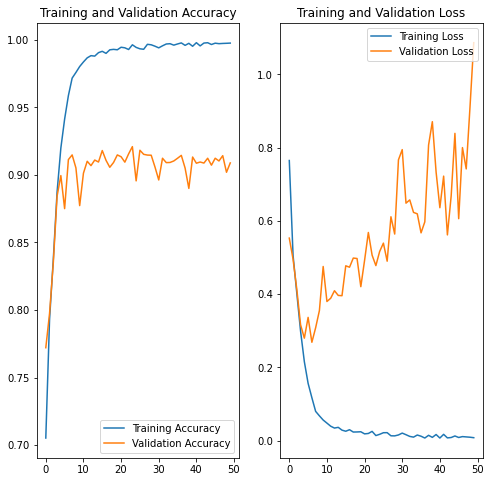

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#overcast 20191030T161529_VOOR

#rain 20161013T164513_YORK.jpg_sliding_window.jpg

#partly 20191112T183029_VOOR

#clear 20190511T122529_VOOR
#clear 20191008T165026_BURT
#clear 20160420T221001_DELE
new_img_path = '/home/mesonet/cam_photos/2018/12/20/VOOR/20181220T175030_VOOR.jpg'
#new_img_path = '/home/arnold/raindrop-detection-cnn/mesonet/20161013T164513_YORK.jpg_sliding_window.jpg'

img = keras.preprocessing.image.load_img(
    new_img_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(predictions)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
PIL.Image.open(new_img_path)


In [ ]:
model.save("/home/arnold/clouds_detection/models/custom_cloud_classification_augmented_3_sites")

In [ ]:
#load model
# It can be used to reconstruct the model identically.
# model = keras.models.load_model("/home/arnold/clouds_detection/models/custom_cloud_classification_augmented_2_sites")

In [ ]:
folder_path = '/home/mesonet/cam_photos/2018/08/17/ESSX'
from keras.preprocessing import image

# load all images into a list
paths = []
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    paths.append(img)
    img = image.load_img(img, target_size=(img_height, img_width))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)
# print(images[1])
# stack up images list to pass for prediction
images = np.vstack(images)
#print(paths)
# for i in paths:
#     PIL.Image.open(i)
#

classes = model.predict_classes(images, batch_size=32)
print(class_names)
print(classes)
predictions = model.predict(images)
score = tf.nn.softmax(predictions[0])
#print(predictions)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
#print(paths[-1])
#PIL.Image.open(paths[-1])
plt.figure(figsize=(10, 10))
for i in range(15):
    ax = plt.subplot(5, 3, i + 1)
    plt.imshow(images[i].astype("uint8"))
#     predictions = model.predict(image[i])
#     score = tf.nn.softmax(predictions[0])
#     plt.title(class_names[np.argmax(score)], 100 * np.max(score))
    plt.title(class_names[classes[i]])
    plt.axis("off")

In [ ]:
#this will select all the file names and put them in a list (from all children sub dirs)
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles    



In [ ]:
import glob
class_names = ['clear', 'few', 'night', 'overcast', 'rain', 'scattered', 'snow']
listOfFiles = glob.glob('/home/mesonet/cam_photos/2019/7/*/BKLN/*')
print(len(listOfFiles))


In [ ]:
# load all images into a list
paths_all = []
images_all = []
for img in listOfFiles:
#     img = os.path.join(folder_path, img)
#     print(img)
    paths_all.append(img)
    img = image.load_img(img, target_size=(img_height, img_width))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images_all.append(img)
# print(images_all[1])    
images_all = np.vstack(images_all)

classes = model.predict_classes(images_all, batch_size=64)
print(class_names)
print(classes)

#save predicted images to folders
#['clear', 'few', 'night', 'overcast', 'rain', 'scattered', 'snow']
print(len(classes))

# r =0
# for k,i in enumerate(classes):
#     if i==0:
#         #save image
# #         print(paths_all[k][-24:])
#         im = PIL.Image.fromarray(images_all[k].astype("uint8"))
#         im.save("/home/arnold/clouds_detection/ALL/clear/"+paths_all[k][-24:])
#     elif i==1:
# #         print(paths_all[k])
#         im = PIL.Image.fromarray(images_all[k].astype("uint8"))
#         im.save("/home/arnold/clouds_detection/ALL/few/"+paths_all[k][-24:])
#     elif i==2:
# #         print(paths_all[k])
#         im = PIL.Image.fromarray(images_all[k].astype("uint8"))
#         im.save("/home/arnold/clouds_detection/ALL/night/"+paths_all[k][-24:])
#     elif i==3:
# #         print(paths_all[k])
#         im = PIL.Image.fromarray(images_all[k].astype("uint8"))
#         im.save("/home/arnold/clouds_detection/ALL/overcast/"+paths_all[k][-24:])    
#     elif i==4:
# #         print(paths_all[k])
#         im = PIL.Image.fromarray(images_all[k].astype("uint8"))
#         im.save("/home/arnold/clouds_detection/ALL/rain/"+paths_all[k][-24:])
#     elif i==5:
# #         print(paths_all[k])
#         im = PIL.Image.fromarray(images_all[k].astype("uint8"))
#         im.save("/home/arnold/clouds_detection/ALL/scattered/"+paths_all[k][-24:])
#     elif i==6:
# #         print(paths_all[k])
#         im = PIL.Image.fromarray(images_all[k].astype("uint8"))
#         im.save("/home/arnold/clouds_detection/ALL/snow/"+paths_all[k][-24:])

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(15):
    ax = plt.subplot(5, 3, i + 1)
    plt.imshow(images_all[i].astype("uint8"))
#     predictions = model.predict(image[i])
#     score = tf.nn.softmax(predictions[0])
#     plt.title(class_names[np.argmax(score)], 100 * np.max(score))
    plt.title(class_names[classes[i]])
    plt.axis("off")

In [ ]:
# #save predicted images to folders
# #['clear', 'few', 'night', 'overcast', 'rain', 'scattered', 'snow']
# print(len(classes))

# r =0
# for k,i in enumerate(classes):
#     if i==4:
#         #save image
#         print(paths_all[k][-24:])
# #         im = PIL.Image.fromarray(images_all[k].astype("uint8"))
# #         im.save("/home/arnold/raindrop-detection-cnn/VOOR/rain/"+paths_all[k][-24:])
#     elif i==6:
#         print(paths_all[k])



In [ ]:
# print (class_names)
j=0
rain_imgs = []
plt.figure(figsize=(10, 9))
for k,i in enumerate(classes):
#     print(k,i)
    if i==6:
        j += 1
        rain_imgs.append(images_all[k])
#         plt.subplot(3,4,i+1)
#         plt.imshow(images_all[k].astype("uint8"))
#         plt.title(class_names[i])
#         plt.axis('off')
#         print(j)
#         print(class_names[i])
#         plt.imshow(images_all[i].astype("uint8"))
# print(rain_imgs)
print(j)
    

In [ ]:
plt.figure(figsize=(10, 9))
# print((rain_imgs[1]))
# plt.imshow(rain_imgs[1].astype("uint8"))
# plt.imshow(rain_imgs[2].astype("uint8"))



for i in range(11):
    plt.subplot(4,3,i+1)
    plt.imshow(rain_imgs[i].astype("uint8"))
#     plt.title(class_names[i])
    plt.axis('off')

In [ ]:
tf_model_predictions = model.predict(images)


In [ ]:
print(tf_model_predictions.shape) #“Prediction results shape:”, (219, 7)
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
# predicted_labels = class_names[predicted_ids]
print(predicted_ids)

In [ ]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5)
for n in range(36): #predicted_labels
    plt.subplot(6,6,n+1)
    plt.imshow(images[n].astype("uint8"))
#     color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
    plt.title(class_names[predicted_ids[n]]) #predicted_labels
    plt.axis('off')
#     _ = plt.suptitle("Model predictions (green: correct, red: incorrect)")